 # Database query to ML input to model

 ### Import libaraies

In [5]:
# %%
import numpy as np
import pandas as pd




In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4632-2130

 Directory of C:\Users\hwbst6\DataTime\student_simple_ml

03/07/2024  14:56    <DIR>          .
03/07/2024  14:56    <DIR>          ..
03/07/2024  14:00    <DIR>          .ipynb_checkpoints
03/07/2024  14:56            11,007 MKR_KNN_ML_001.ipynb
03/07/2024  14:55            66,177 Project Data Sheets.csv
03/07/2024  13:55             1,012 README.md
               3 File(s)         78,196 bytes
               3 Dir(s)  66,694,455,296 bytes free


 ### Loading spec data from local disk

In [6]:
 spec_inp= pd.DataFrame()
try:
    spec_inp = pd.read_csv(f'Project Data Sheets.csv')
except PermissionError:
    print('The file we are trying to open may be open in another \
                program, please close and try again!')

spec_inp.head()

,Concentration,Chem Clas,220,223,226,229,232,235,238,241,...,721,724,727,730,733,736,739,742,745,748
0,25,RNA,0.176,0.134,0.082,0.047,0.033,0.020,0.015,0.013,...,0.002,0.001,0.002,0.000,0.003,0.004,0.002,0.003,0.004,0.005
1,25,RNA,0.189,0.136,0.077,0.034,0.019,0.006,0.001,-0.001,...,0.008,0.007,0.013,0.012,0.007,0.009,0.007,0.010,0.005,0.009
2,25,RNA,0.202,0.145,0.092,0.052,0.036,0.023,0.020,0.016,...,0.007,0.004,0.006,0.003,0.001,0.004,0.007,0.005,0.007,0.006
3,12.5,RNA,0.201,0.142,0.086,0.048,0.033,0.023,0.018,0.016,...,0.008,0.006,0.008,0.005,0.003,0.005,0.008,0.005,0.008,0.008
4,12.5,RNA,0.204,0.149,0.094,0.050,0.035,0.025,0.020,0.017,...,0.008,0.006,0.006,0.005,0.004,0.007,0.011,0.008,0.008,0.008


 ### Data cleaning

In [15]:
spec_dat = spec_inp.drop(axis=1, columns=['Concentration'])
spec_dat.head()


,Chem Clas,220,223,226,229,232,235,238,241,244,...,721,724,727,730,733,736,739,742,745,748
1,RNA,0.189,0.136,0.077,0.034,0.019,0.006,0.001,-0.001,-0.005,...,0.008,0.007,0.013,0.012,0.007,0.009,0.007,0.010,0.005,0.009
2,RNA,0.202,0.145,0.092,0.052,0.036,0.023,0.020,0.016,0.013,...,0.007,0.004,0.006,0.003,0.001,0.004,0.007,0.005,0.007,0.006
3,RNA,0.201,0.142,0.086,0.048,0.033,0.023,0.018,0.016,0.014,...,0.008,0.006,0.008,0.005,0.003,0.005,0.008,0.005,0.008,0.008
4,RNA,0.204,0.149,0.094,0.050,0.035,0.025,0.020,0.017,0.015,...,0.008,0.006,0.006,0.005,0.004,0.007,0.011,0.008,0.008,0.008
5,RNA,0.233,0.173,0.103,0.060,0.043,0.032,0.025,0.023,0.019,...,0.010,0.004,0.005,0.002,0.000,0.008,0.010,0.006,0.006,0.007


 ## Building KNN clasifcation model with scikitlearn

 ### Splitting into scores(y) and disciptors (x)

In [18]:
# %%
# uses sklearn to normalise the spectral part of the df then do ML prep
from sklearn import preprocessing

#pandas DataFrame into a NumPy array
X = spec_dat.drop("Chem Clas", axis=1)
X = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X = X.values
y = spec_dat["Chem Clas"]
y = y.values



[[0.26624406 0.13373494 0.05894519 ... 0.39393939 0.3        0.73684211]
 [0.28684628 0.14457831 0.07445708 ... 0.24242424 0.4        0.57894737]
 [0.28526149 0.14096386 0.06825233 ... 0.24242424 0.45       0.68421053]
 ...
 [0.55942948 0.43373494 0.35367115 ... 0.39393939 0.65       0.78947368]
 [0.53248811 0.43253012 0.41468459 ... 0.48484848 0.7        0.78947368]
 [0.         0.         0.         ... 0.72727273 0.4        0.52631579]]


 ### Splitting data into test and training setting

In [19]:
# %%
# Splitting Data Into Training and Test Sets for Model Evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=54321
)




 ## Building KNN classification model with scikitlearn

 ### Fitting a kNN classification

In [20]:
# %%
# setting up model!
from sklearn.neighbors import KNeighborsClassifier
knn_c_model = KNeighborsClassifier(n_neighbors=3)

#running model
knn_c_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [21]:
# %%
# calculating rmse on training set
from sklearn.metrics import accuracy_score
from math import sqrt
train_c_preds = knn_c_model.predict(X_train)
test_c_preds = knn_c_model.predict(X_test)
train_accuracy = accuracy_score(y_train, train_c_preds)
test_accuracy = accuracy_score(y_test, test_c_preds)
print("Accuracy train:", train_accuracy)
print("Accuracy test:", test_accuracy)


Accuracy train: 0.9583333333333334
Accuracy test: 0.8461538461538461


C:\Users\hwbst6\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hwbst6\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

 ### Using Cross Validation to Get the Best Value of k

In [29]:
# %%
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
k_values = [i for i in range (2,25)]
scores = []

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))


C:\Users\hwbst6\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hwbst6\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\hwbst6\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hwbst6\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Text(0, 0.5, 'Accuracy Score')

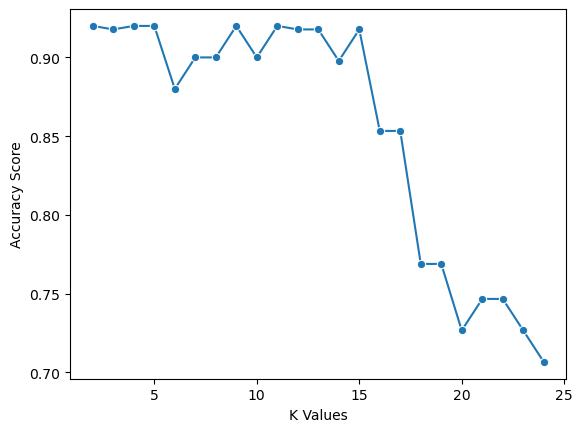

In [30]:
# %%
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


In [ ]:
# %%
### train our model using the best k value


In [31]:
# %%
#best_index = [x for x in best_index if str(x) != 'nan']
best_index = np.argmax(scores)
print(scores)
print(best_index)
best_k = k_values[best_index]
print(best_k)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


[0.9199999999999999, 0.9177777777777777, 0.9199999999999999, 0.9199999999999999, 0.8800000000000001, 0.9, 0.9, 0.9199999999999999, 0.9, 0.9199999999999999, 0.9177777777777777, 0.9177777777777777, 0.8977777777777778, 0.9177777777777777, 0.8533333333333333, 0.8533333333333333, 0.768888888888889, 0.768888888888889, 0.7266666666666666, 0.7466666666666667, 0.7466666666666667, 0.7266666666666666, 0.7066666666666667]
0
2


KNeighborsClassifier(n_neighbors=2)

In [32]:
# %%
from sklearn.metrics import precision_score, recall_score

y_pred = knn.predict(X_test)
# need to think about precision and acuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')#needs some thought
recall = recall_score(y_test, y_pred, average='macro')#needs some thought

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8461538461538461
Precision: 0.8461538461538461
Recall: 0.8666666666666667


C:\Users\hwbst6\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


 ## Confusion matrix

In [46]:
# %%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


In [48]:
# %%
confusion_matrix(y_test,y_pred)


array([[4, 0, 0],
       [0, 4, 0],
       [2, 0, 3]], dtype=int64)

In [49]:
# %%
confusion_matrix=confusion_matrix(y_test,y_pred)


<function matplotlib.pyplot.show(close=None, block=None)>

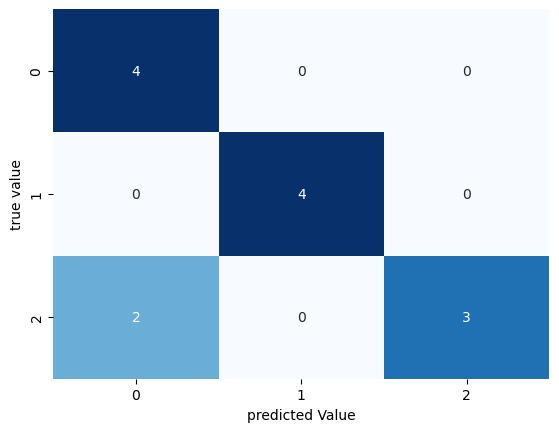

In [38]:
# %%
sns.heatmap(confusion_matrix,cmap='Blues',cbar=False, annot=True)
plt.xlabel("predicted Value")
plt.ylabel("true value")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

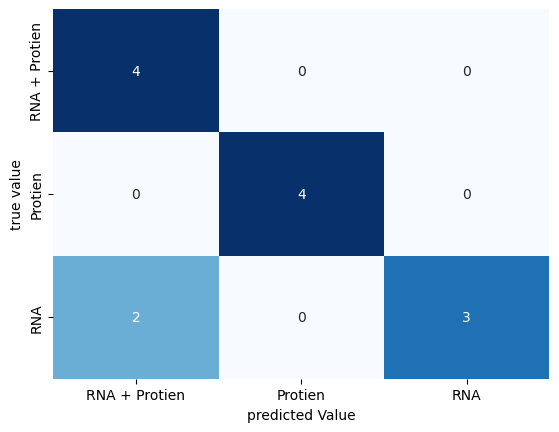

In [51]:
# %%
sns.heatmap(confusion_matrix,cmap='Blues',cbar=False, annot=True)
plt.xticks(np.arange(3)+0.5,["RNA + Protien","Protien","RNA"])
plt.yticks(np.arange(3)+0.5,["RNA + Protien","Protien","RNA"])
plt.xlabel("predicted Value")
plt.ylabel("true value")
plt.show
